# Data scraping container imports/exports at POLA

In this notebook, you will scrap container unit information from:
https://www.portoflosangeles.org/business/statistics/container-statistics/historical-teu-statistics-2018
ranging in years from 1996 to 2018

After that, some initial exploratory data analysis is conducted 

In [168]:
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import urllib.request
import urllib.parse
import requests
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
url2018 = 'https://www.portoflosangeles.org/business/statistics/container-statistics/historical-teu-statistics-2018'

In [3]:
from requests_html import HTMLSession
session = HTMLSession()

r = session.get(url2018)

In [4]:
soup_tree= BeautifulSoup(r.html.raw_html, 'html.parser')

In [5]:
data_html2018 = soup_tree.find_all('td')

In [6]:
data_html2018

[<td align="center" class="Categories_pad right_bar" style="background-color: rgb(38, 100, 38);" width="12%"> </td>,
 <td align="center" class="right_bar" style="background-color: rgb(38, 100, 38);" width="9%">
 <p><span style="color: rgb(255, 255, 255);">Loaded Imports</span></p>
 </td>,
 <td align="center" class="right_bar" style="background-color: rgb(38, 100, 38);" width="8%">
 <p><span style="color: rgb(255, 255, 255);">Empty Imports</span></p>
 </td>,
 <td align="center" class="right_bar" style="background-color: rgb(38, 100, 38);" width="9%">
 <p><span style="color: rgb(255, 255, 255);">Total Imports</span></p>
 </td>,
 <td align="center" class="right_bar" style="background-color: rgb(38, 100, 38);" width="9%">
 <p><span style="color: rgb(255, 255, 255);">Loaded Exports</span></p>
 </td>,
 <td align="center" class="right_bar" style="background-color: rgb(38, 100, 38);" width="8%">
 <p><span style="color: rgb(255, 255, 255);">Empty Exports</span></p>
 </td>,
 <td align="center" c

In [7]:
for item in data_html2018[9:]:
    print(item.contents)

['January']
['422,831.95']
['9,296.80']
['432,128.75']
['150,035.25']
['226,564.50']
['376,599.75']
['808,728.50']
['-2.17%']
['February']
['383,089.55']
['9,593.40']
['392,682.95']
['157,591.25']
['174,785.25']
['332,376.50']
['725,059.45']
['15.94%']
['March']
['264,460.05']
['9,382.20']
['273,842.25']
['163,706.65']
['140,317.00']
['304,023.65']
['577,865.90']
['-26.72%']
['April']
['361,108.30']
['\xa011,418.00\xa0']
['\xa0372,526.30']
['\xa0164,703.65']
['\xa0168,306.00\xa0']
['333,009.65']
['\xa0705,535.95']
['-1.29%']
['May']
['405,586.80']
['11,785.80']
['\xa0417,372.60']
['168,680.75']
['\xa0182,751.00']
['351,431.75']
['768,804.35']
['-3.44%']
['June']
['382,964.00']
['\xa010,401.15']
['393,365.15']
['\xa0147,563.25']
['\xa0182,212.75\xa0']
['329,776.00']
['723,141.15']
['-1.08%']
['July']
['438,164.55']
['16,517.05']
['454,681.60']
['\xa0167,991.75']
['\xa0210,894.50']
['378,886.25']
['833,567.85']
['4.61%']
['August']
['420,573.25']
['20,103.15']
['440,676.40']
['162,465.50

In [31]:
data_2018 = [(item.contents[0].string) for item in data_html2018[9:]]

In [33]:
# Remove new line formating
for i,item in enumerate(data_2018):
    if item == '\n':
        data_2018.pop(i)

In [37]:
# Remove commas in numbers:
for i,item in enumerate(data_2018):
    if ',' in item:
        data_2018[i] = item.replace(',','')

In [65]:
(data_2018[32])

'\xa0168306.00\xa0'

In [54]:
data_2018

['January',
 '422831.95',
 '9296.80',
 '432128.75',
 '150035.25',
 '226564.50',
 '376599.75',
 '808728.50',
 '-2.17%',
 'February',
 '383089.55',
 '9593.40',
 '392682.95',
 '157591.25',
 '174785.25',
 '332376.50',
 '725059.45',
 '15.94%',
 'March',
 '264460.05',
 '9382.20',
 '273842.25',
 '163706.65',
 '140317.00',
 '304023.65',
 '577865.90',
 '-26.72%',
 'April',
 '361108.30',
 '\xa011418.00\xa0',
 '\xa0372526.30',
 '\xa0164703.65',
 '\xa0168306.00\xa0',
 '333009.65',
 '\xa0705535.95',
 '-1.29%',
 'May',
 '405586.80',
 '11785.80',
 '\xa0417372.60',
 '168680.75',
 '\xa0182751.00',
 '351431.75',
 '768804.35',
 '-3.44%',
 'June',
 '382964.00',
 '\xa010401.15',
 '393365.15',
 '\xa0147563.25',
 '\xa0182212.75\xa0',
 '329776.00',
 '723141.15',
 '-1.08%',
 'July',
 '438164.55',
 '16517.05',
 '454681.60',
 '\xa0167991.75',
 '\xa0210894.50',
 '378886.25',
 '833567.85',
 '4.61%',
 'August',
 '420573.25',
 '20103.15',
 '440676.40',
 '162465.50',
 '223496.50',
 '385962.00',
 '826638.40',
 '-2.50%

In [57]:
# January
data_2018[1:8]

['422831.95',
 '9296.80',
 '432128.75',
 '150035.25',
 '226564.50',
 '376599.75',
 '808728.50']

In [58]:
# February
data_2018[10:17]

['383089.55',
 '9593.40',
 '392682.95',
 '157591.25',
 '174785.25',
 '332376.50',
 '725059.45']

In [62]:
# November
data_2018[91:98]

['422792.65',
 '17173.50',
 '439966.15',
 '152527.00',
 '239837.75',
 '392364.75',
 '832330.90']

In [66]:
# Assuming the same pattern will be met for each page, we can write up monthly indexes:
Jan = (1,8)
Feb = (10,17)
Mar = (19,26)
Apr = (28,35)
May = (37,44)
Jun = (46,53)
Jul = (55,62)
Aug = (64,71)
Sep = (73,80)
Oct = (82,89)
Nov = (91,98)
Dec = (100,107)

In [76]:
months = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]

In [67]:
url_begin = 'https://www.portoflosangeles.org/business/statistics/container-statistics/historical-teu-statistics-'

In [68]:
# Try for 2017:
url2017 = url_begin+'2017'

In [69]:
from requests_html import HTMLSession
session = HTMLSession()

r = session.get(url2017)

In [70]:
soup_tree= BeautifulSoup(r.html.raw_html, 'html.parser')

In [71]:
data_html2017 = soup_tree.find_all('td')

In [72]:
data_2017 = [(item.contents[0].string) for item in data_html2017[9:]]

In [73]:
for i,item in enumerate(data_2017):
    if item == '\n':
        data_2017.pop(i)

In [74]:
for i,item in enumerate(data_2017):
    if ',' in item:
        data_2017[i] = item.replace(',','')

In [45]:
data_2017

['January',
 '415422.70',
 '12974.60',
 '428397.30',
 '162420.00',
 '235822.25',
 '398242.25',
 '826639.55',
 '17.35%',
 'February',
 '298974.95',
 '9606.80',
 '308581.75',
 '155357.65',
 '161441.75',
 '316799.40',
 '625381.15',
 '-12.38%',
 'March',
 '373548.95',
 '12088.00',
 '385636.95',
 '191771.75',
 '211115.00',
 '402886.75',
 '788523.70',
 '28.66%',
 'April',
 '372040.90',
 '9475.75',
 '381516.65',
 '157661.50',
 '175576.90',
 '333238.40',
 '714755.05',
 '8.93%',
 'May',
 '413021.30',
 '11480.65',
 '424501.95',
 '169639.00',
 '202075.75',
 '371714.75',
 '796216.70',
 '3.35%',
 'June',
 '372272.10',
 '10511.50',
 '382783.60',
 '145527.50',
 '202721.25',
 '348248.75',
 '731032.35',
 '8.14%',
 'July',
 '417090.75',
 '10587.20',
 '427677.95',
 '154925.75',
 '214200.30',
 '369126.05',
 '796804.00',
 '15.83%',
 'August',
 '432479.15',
 '10559.65',
 '443038.80',
 '159197.00',
 '245621.25',
 '404818.25',
 '847857.05',
 '6.12%',
 'September',
 '388670.05',
 '9696.20',
 '398366.25',
 '128

In [75]:
# Feb
data_2017[10:17]

['298974.95',
 '9606.80',
 '308581.75',
 '155357.65',
 '161441.75',
 '316799.40',
 '625381.15']

In [132]:
num_data_2017 = np.zeros((12,9))

In [135]:
yr = 2017
for i,month in enumerate(months):
    num_data_2017[i][0] = int(yr)
    num_data_2017[i][1] = int(i)
    for j,num in enumerate(data_2017[month[0]:month[1]]):
        num_data_2017[i][j+2] = num

In [149]:
num_data_2017[2][5]

191771.75

In [ ]:
# Works for 2017, now can do it across years 1996 - 2018:

In [143]:
yrs = [i for i in range(1996,2019)]

In [146]:
# Number of rows necessary:

276

In [158]:
# Create empty array to place data:
num_data = np.zeros((12*len(yrs),9))

# Url starting text:
url_begin = 'https://www.portoflosangeles.org/business/statistics/container-statistics/historical-teu-statistics-'

for i,yr in enumerate(yrs):
    # Set url
    url = url_begin + str(yr)
    session = HTMLSession()
    # get response
    r = session.get(url)
    time.sleep(2)
    # Parse html
    soup_tree= BeautifulSoup(r.html.raw_html, 'html.parser')
    data_html = soup_tree.find_all('td')
    # Convert to data list
    data = [(item.contents[0].string) for item in data_html[9:]]
    # Get rid of '\n'
    for m,item in enumerate(data):
        if item == '\n':
            data.pop(m)
    # Get rid of commas in numbers
    for m,item in enumerate(data):
        if ',' in item:
            data[m] = item.replace(',','')
    # Run through months and save data
    for j,month in enumerate(months):
        num_data[(i*12)+j][0] = yr
        num_data[(i*12)+j][1] = j
        for k,num in enumerate(data[month[0]:month[1]]):
            num_data[(i*12)+j][k+2] = num

In [162]:
df_cont = pd.DataFrame(num_data)

In [165]:
df_cont.columns = ['Year','Month','Loaded Imports','Empty Imports','Total Imports','Loaded Exports','Empty Exports','Total Exports','Total TEUs']

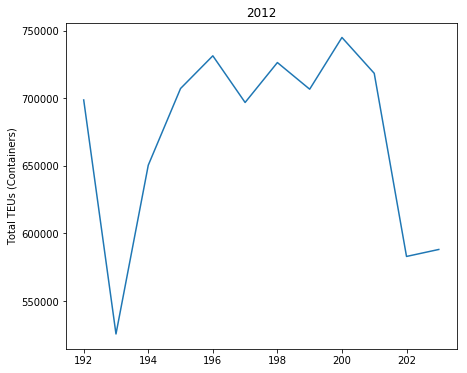

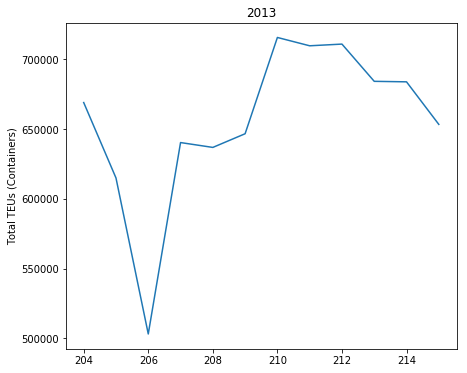

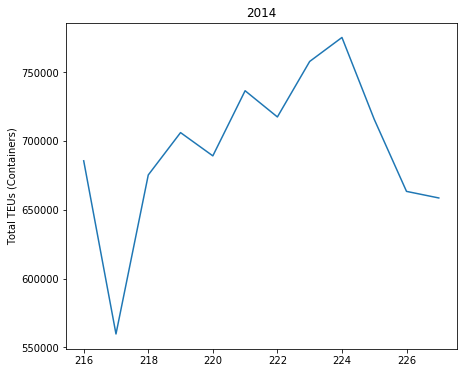

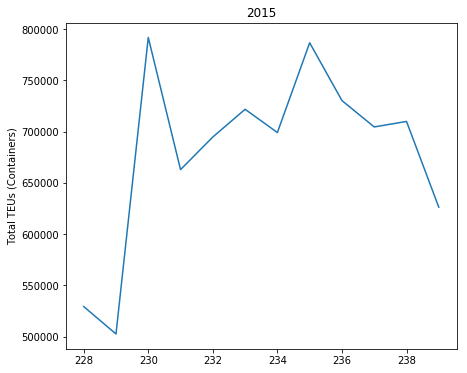

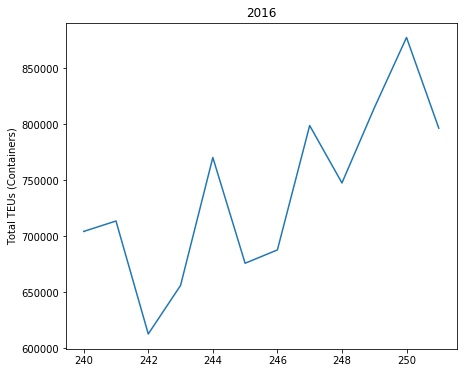

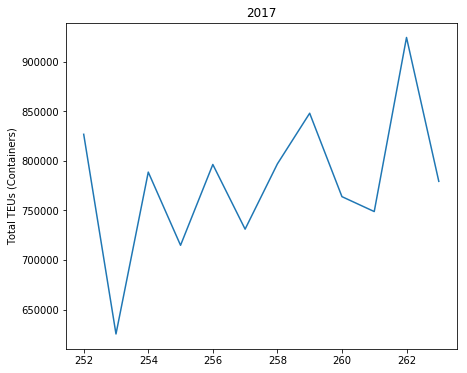

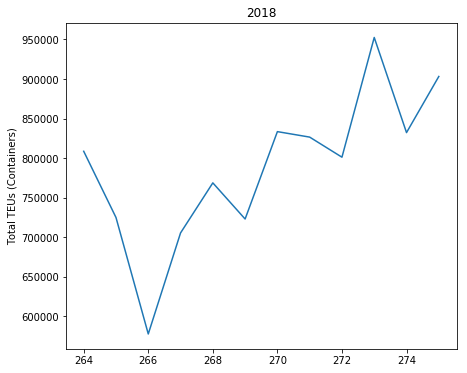

In [193]:
def plot_yr(yr):
    plt.figure(figsize=(7,6))
    plt.plot(df_cont.loc[df_cont['Year']==yr,'Total TEUs'])
    plt.title(str(yr))
    plt.ylabel('Total TEUs (Containers)')
    plt.show()

for i in range(2012,2019):
    plot_yr(i)